In [24]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기



In [25]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [26]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
results = [1]*35+[0]*14

In [27]:
# DataFrame
data = [length,weight,results]    
df = pd.DataFrame(data)
df = df.T
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [28]:
datas = df.iloc[:,0:2]
datas

results = df.iloc[:,2]
results

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: 2, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
# random_state=42 훈련세트,테스트세트가 할때마다 섞이지 않도록 해줌.
# stratify : 설정데이터를 가지고 랜덤으로 데이터를 섞어줌.
train_input,test_input, train_target,test_target = train_test_split( datas,results,stratify=results )

train_input

,0,1
13,32.0,340.0
42,11.8,9.9
12,31.5,500.0
40,11.3,8.7
5,29.7,450.0
17,33.0,700.0
47,14.3,19.7
0,25.4,242.0
32,39.5,925.0
7,30.0,390.0


In [30]:
# 1. 데이터 전처리 - Nan, 0, 타입, 표준화작업 , 훈련세트, 테스트세트 구성
# 2. 데이터 학습시키기
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 3. 데이터 예측하기
predict = clf.predict(test_input)
predict

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.])

In [31]:
# 4. 정확도 측정
score = clf.score(test_input,test_target)
print("정답률 : ",score)

정답률 :  1.0


In [32]:
# 실험 데이터로 확인
predict = clf.predict([[30,600]])
print("판별 : ",predict)

판별 :  [1.]


In [33]:
# 25,150의 데이터는 knn판별할때 이웃하는 데이터는 indexes
distances,indexes = clf.kneighbors([[25,150]])
indexes

array([[ 7, 17,  6, 10, 18]], dtype=int64)

In [34]:
indexes[0]

array([ 7, 17,  6, 10, 18], dtype=int64)

In [35]:
train_input.iloc[indexes[0],0]

0     25.4
48    15.0
47    14.3
1     26.3
41    11.8
Name: 0, dtype: float64

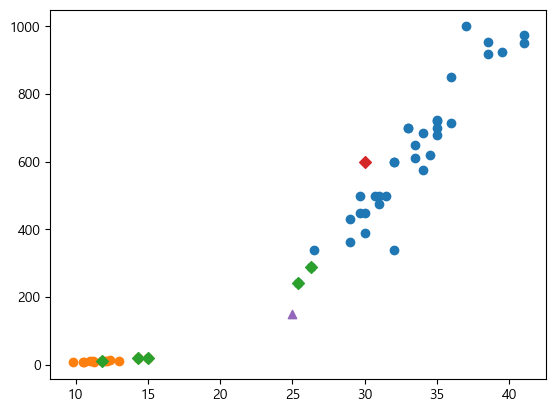

In [36]:
# 25, 125의 고기를 측정하시오.
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1], marker='D')
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')
# plt.xticks([0,1000])

In [37]:
# 실험 데이터로 확인
predict = clf.predict([[25,150]])
print("판별 : ",predict)

판별 :  [0.]


In [38]:
# pandas - 평균, 표준편차 mean, std
train_input.mean()
train_input.std()

0     10.272483
1    327.552598
dtype: float64

In [39]:
# 표준점수 : 훈련데이터 - 평균 / 표준편차
# numpy : 평균,표준편차

mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)
std

0     10.128804
1    322.971217
dtype: float64

In [40]:
# train_input,test_input

train_scaled = (train_input - mean) / std
# test_scaled = (test_input - mean) / std

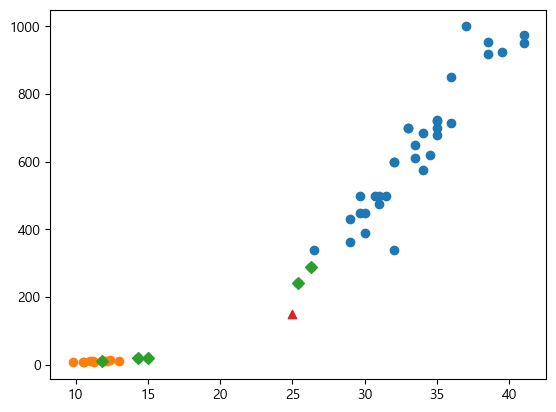

In [41]:
# 25, 125의 고기를 측정하시오.
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1], marker='D')
# plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')
# plt.xticks([0,1000])

In [42]:
new = ([25,150]-mean)/std
new

0   -0.200473
1   -0.881485
dtype: float64

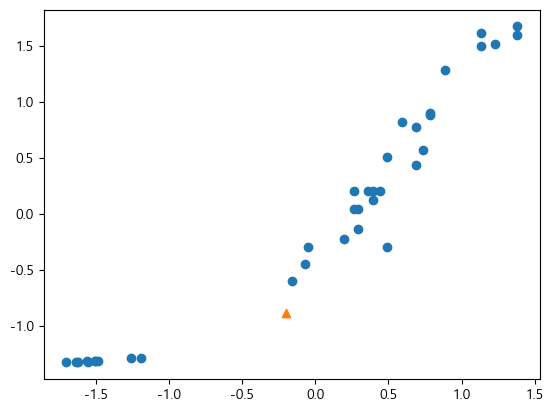

In [43]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(new[0],new[1],marker='^')

In [44]:
clf.fit(train_scaled,train_target)

KNeighborsClassifier()

In [45]:
test_saled = (test_input - mean) / std

In [46]:
score = clf.score(test_saled,test_target)
print("정답률 :",score)

정답률 : 1.0


In [47]:
predict = clf.predict([new])
print("예측값 : ",predict)

예측값 :  [1.]


In [48]:
# knn 예측에 사용한 데이터 
distances, indexes = clf.kneighbors([new])
indexes

array([[ 7, 10, 32, 31,  9]], dtype=int64)

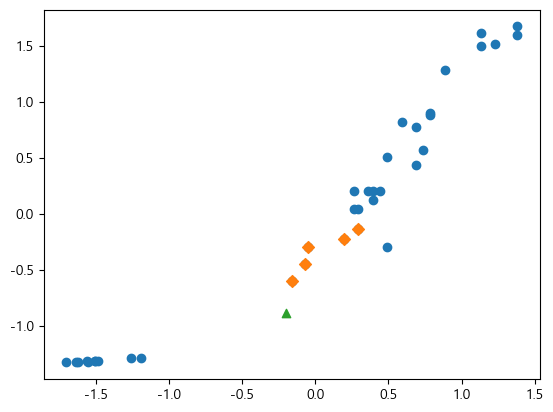

In [49]:
# 25, 125의 고기를 측정하시오.
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(train_scaled.iloc[indexes[0],0],train_scaled.iloc[indexes[0],1], marker='D')
plt.scatter(new[0],new[1],marker='^')